In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

In [2]:
data_x = [2.00, 2.10, 2.20, 2.30, 2.40, 2.50, 2.60, 2.70, 2.80, 2.90, 3.00] 
                #supongo datos en x sin error.

data_y = [2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99]
sigma = 0.3

In [3]:
a1 = []
a2 = []
j=0
while j<=500:
    
    D_x = []    #Datos en x
    for i in data_x:
        D_x+= list(np.zeros(500)+i)

    D_y = []
    for i in data_y:
        D_y+= list(norm.rvs(loc = i, scale=sigma, size=500))

    a1.append(linregress(D_x, D_y)[0])
    a2.append(linregress(D_x, D_y)[1])
    j=j+1


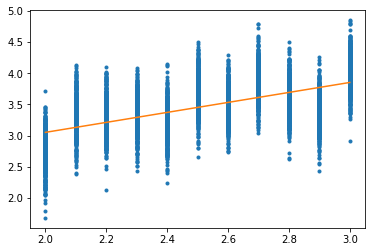

In [4]:
#un ejemplo generico se lo que se ve
x = np.linspace(2,3,100)
plt.plot( D_x, D_y,'.');
plt.plot(x,linregress(D_x, D_y)[0]*x + linregress(D_x, D_y)[1])

(0.012692531589268568, 0.7980106790991646)

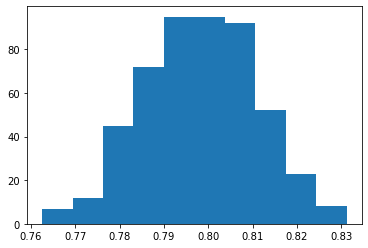

In [5]:
plt.hist(a1);
np.std(a1), np.mean(a1)

(0.032240526698329205, 1.4548193591130605)

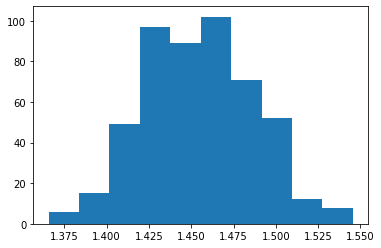

In [7]:
plt.hist(a2);
np.std(a2), np.mean(a2)

In [8]:
linregress(data_x, data_y)

LinregressResult(slope=0.7990909090909094, intercept=1.4522727272727267, rvalue=0.7919240297093963, pvalue=0.003670724510704689, stderr=0.20538190366839446, intercept_stderr=0.517546096836582)

In [1]:
2+2

4

In [9]:
2*3

6